In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import os


In [24]:
# zip_path = "C:/Users/anony/Downloads/isic-2024-challenge.zip"

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall('isic-2024-challenge')

In [25]:
# chatbot_training_data = pd.read_csv('Chatbot-arena/train.csv')
# chatbot_testing_data = pd.read_csv('Chatbot-arena/test.csv')

# stratascratch_data = pd.read_csv('StrataScratch_Uber/ds_challenge_v2_1_data.csv')

isic_train = pd.read_csv('isic-2024-challenge/train-metadata.csv')



def load_data(path):
    data = []
    for filename in os.listdir(path):
        if filename.endswith(".jpg"):
            data.append(filename)
    return data

all_images = load_data('isic-2024-challenge/train-image/image')
print(len(all_images))



C:\Users\anony\AppData\Local\Temp\ipykernel_16996\2791341871.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  isic_train = pd.read_csv('isic-2024-challenge/train-metadata.csv')


401059


In [26]:


benign_count = isic_train['iddx_full'].str.startswith('Benign').sum()
malignant_count = isic_train['iddx_full'].str.startswith('Malignant').sum()
indeterminate_count = isic_train['iddx_full'].str.startswith('Indeterminate').sum()

print(f"Benign cases: {benign_count}")
print(f"Malignant cases: {malignant_count}")
print(f"Indeterminate cases: {indeterminate_count}")



Benign cases: 400552
Malignant cases: 393
Indeterminate cases: 114


In [27]:
'''
isic_id:	Unique case identifier.
patient_id: 	Unique patient identifier.
age_approx: Approximate age of patient at time of imaging.
sex:	Sex of the person.
anatom_site_general:	Location of the lesion on the patient's body.
clin_size_long_diam_mm:	Maximum diameter of the lesion (mm).+
image_type:	Structured field of the ISIC Archive for image type.
tbp_tile_type:	Lighting modality of the 3D TBP source image.
tbp_lv_A:	A inside lesion.+
tbp_lv_Aex:	A outside lesion.+
tbp_lv_B:	B inside lesion.+
tbp_lv_Bext:	B outside lesion.+
tbp_lv_C:	Chroma inside lesion.+
tbp_lv_Cext:	Chroma outside lesion.+
tbp_lv_H:	Hue inside the lesion; calculated as the angle of A* and B* in LAB* color space. Typical values range from 25 (red) to 75 (brown).+
tbp_lv_Hext:	Hue outside lesion.+
tbp_lv_L:	L inside lesion.+
tbp_lv_Lext:	L outside lesion.+
tbp_lv_areaMM2:	Area of lesion (mm^2).+
tbp_lv_area_perim_ratio:	Border jaggedness, the ratio between lesions perimeter and area. Circular lesions will have low values; irregular shaped lesions will have higher values. Values range 0-10.+
tbp_lv_color_std_mean:	Color irregularity, calculated as the variance of colors within the lesion's boundary.
tbp_lv_deltaA:	Average A contrast (inside vs. outside lesion).+
tbp_lv_deltaB:	Average B contrast (inside vs. outside lesion).+
tbp_lv_deltaL:	Average L contrast (inside vs. outside lesion).+
tbp_lv_deltaLBnorm:	Contrast between the lesion and its immediate surrounding skin. Low contrast lesions tend to be faintly visible such as freckles; high contrast lesions tend to be those with darker pigment. Calculated as the average delta LB of the lesion relative to its immediate background in LAB* color space. Typical values range from 5.5 to 25.+
tbp_lv_eccentricity:	Eccentricity.+
tbp_lv_location:	Classification of anatomical location, divides arms & legs to upper & lower; torso into thirds.+
tbp_lv_location_simple:	Classification of anatomical location, simple.+
tbp_lv_minorAxisMM:	Smallest lesion diameter (mm).+
tbp_lv_nevi_confidence:	Nevus confidence score (0-100 scale) is a convolutional neural network classifier estimated probability that the lesion is a nevus. The neural network was trained on approximately 57,000 lesions that were classified and labeled by a dermatologist.+,++
tbp_lv_norm_border:	Border irregularity (0-10 scale); the normalized average of border jaggedness and asymmetry.+
tbp_lv_norm_color:	Color variation (0-10 scale); the normalized average of color asymmetry and color irregularity.+
tbp_lv_perimeterMM:	Perimeter of lesion (mm).+
tbp_lv_radial_color_std_max:	Color asymmetry, a measure of asymmetry of the spatial distribution of color within the lesion. This score is calculated by looking at the average standard deviation in LAB* color space within concentric rings originating from the lesion center. Values range 0-10.+
tbp_lv_stdL:	Standard deviation of L inside lesion.+
tbp_lv_stdLExt:	Standard deviation of L outside lesion.+
tbp_lv_symm_2axis:	Border asymmetry; a measure of asymmetry of the lesion's contour about an axis perpendicular to the lesion's most symmetric axis. Lesions with two axes of symmetry will therefore have low scores (more symmetric), while lesions with only one or zero axes of symmetry will have higher scores (less symmetric). This score is calculated by comparing opposite halves of the lesion contour over many degrees of rotation. The angle where the halves are most similar identifies the principal axis of symmetry, while the second axis of symmetry is perpendicular to the principal axis. Border asymmetry is reported as the asymmetry value about this second axis. Values range 0-10.+
tbp_lv_symm_2axis_angle:	Lesion border asymmetry angle.+
tbp_lv_x:	X-coordinate of the lesion on 3D TBP.+
tbp_lv_y:	Y-coordinate of the lesion on 3D TBP.+
tbp_lv_z:	Z-coordinate of the lesion on 3D TBP.+
target: Binary class {0: benign, 1: malignant}.

iddx_full: Fully classified lesion diagnosis.
iddx_1: First level lesion diagnosis.
iddx_2: Second level lesion diagnosis.
iddx_3: Third level lesion diagnosis.
iddx_4: Fourth level lesion diagnosis.
iddx_5: Fifth level lesion diagnosis.
mel_mitotic_index: Mitotic index of invasive malignant melanomas.
mel_thick_mm: Thickness in depth of melanoma invasion.
tbp_lv_dnn_lesion_confidence: Lesion confidence score (0-100 scale).
'''

"\nisic_id:\tUnique case identifier.\npatient_id: \tUnique patient identifier.\nage_approx: Approximate age of patient at time of imaging.\nsex:\tSex of the person.\nanatom_site_general:\tLocation of the lesion on the patient's body.\nclin_size_long_diam_mm:\tMaximum diameter of the lesion (mm).+\nimage_type:\tStructured field of the ISIC Archive for image type.\ntbp_tile_type:\tLighting modality of the 3D TBP source image.\ntbp_lv_A:\tA inside lesion.+\ntbp_lv_Aex:\tA outside lesion.+\ntbp_lv_B:\tB inside lesion.+\ntbp_lv_Bext:\tB outside lesion.+\ntbp_lv_C:\tChroma inside lesion.+\ntbp_lv_Cext:\tChroma outside lesion.+\ntbp_lv_H:\tHue inside the lesion; calculated as the angle of A* and B* in LAB* color space. Typical values range from 25 (red) to 75 (brown).+\ntbp_lv_Hext:\tHue outside lesion.+\ntbp_lv_L:\tL inside lesion.+\ntbp_lv_Lext:\tL outside lesion.+\ntbp_lv_areaMM2:\tArea of lesion (mm^2).+\ntbp_lv_area_perim_ratio:\tBorder jaggedness, the ratio between lesions perimeter and

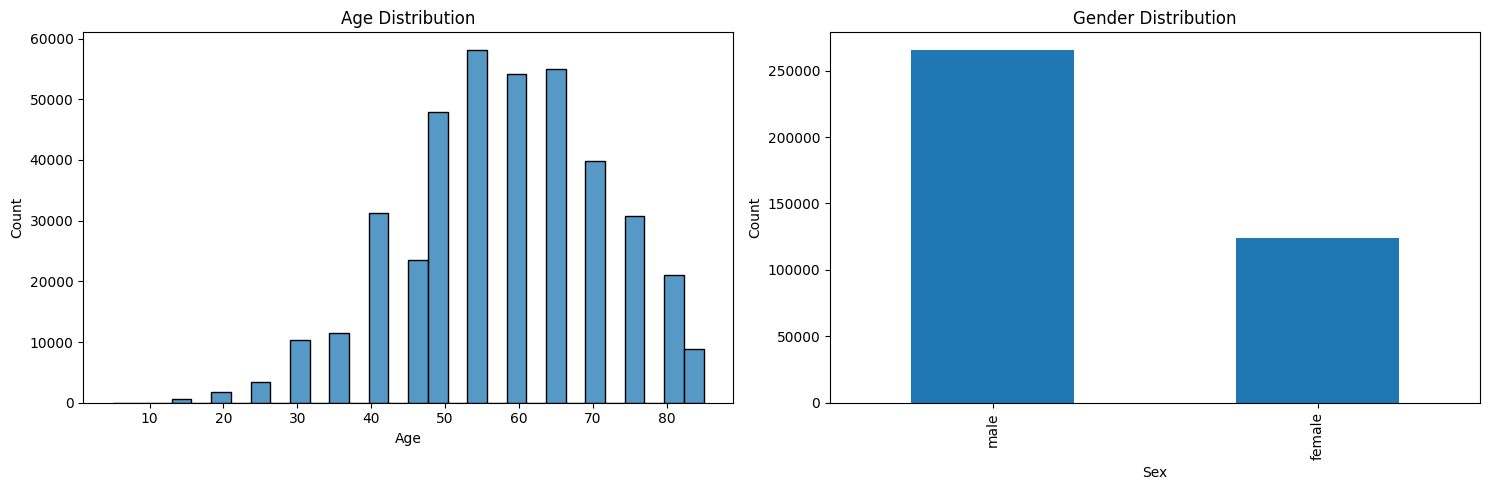

In [30]:
# Demographic Analysis
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(data=isic_train, x='age_approx', bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Sex distribution
plt.subplot(1, 2, 2)
isic_train['sex'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

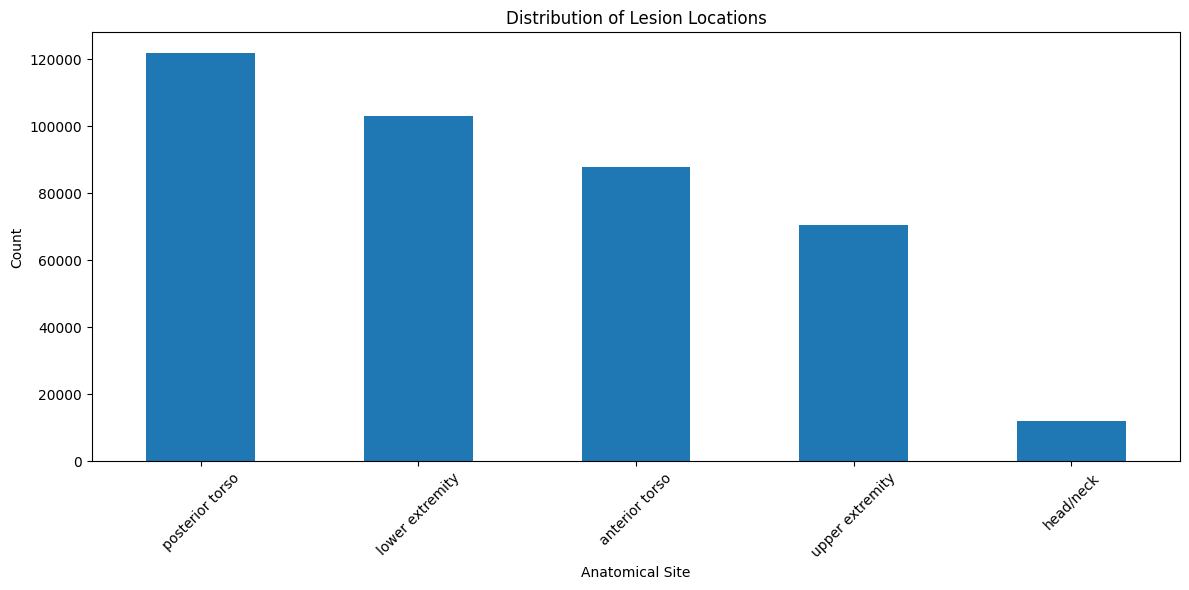

In [31]:
# Anatomical Site Analysis
plt.figure(figsize=(12, 6))
isic_train['anatom_site_general'].value_counts().plot(kind='bar')
plt.title('Distribution of Lesion Locations')
plt.xlabel('Anatomical Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

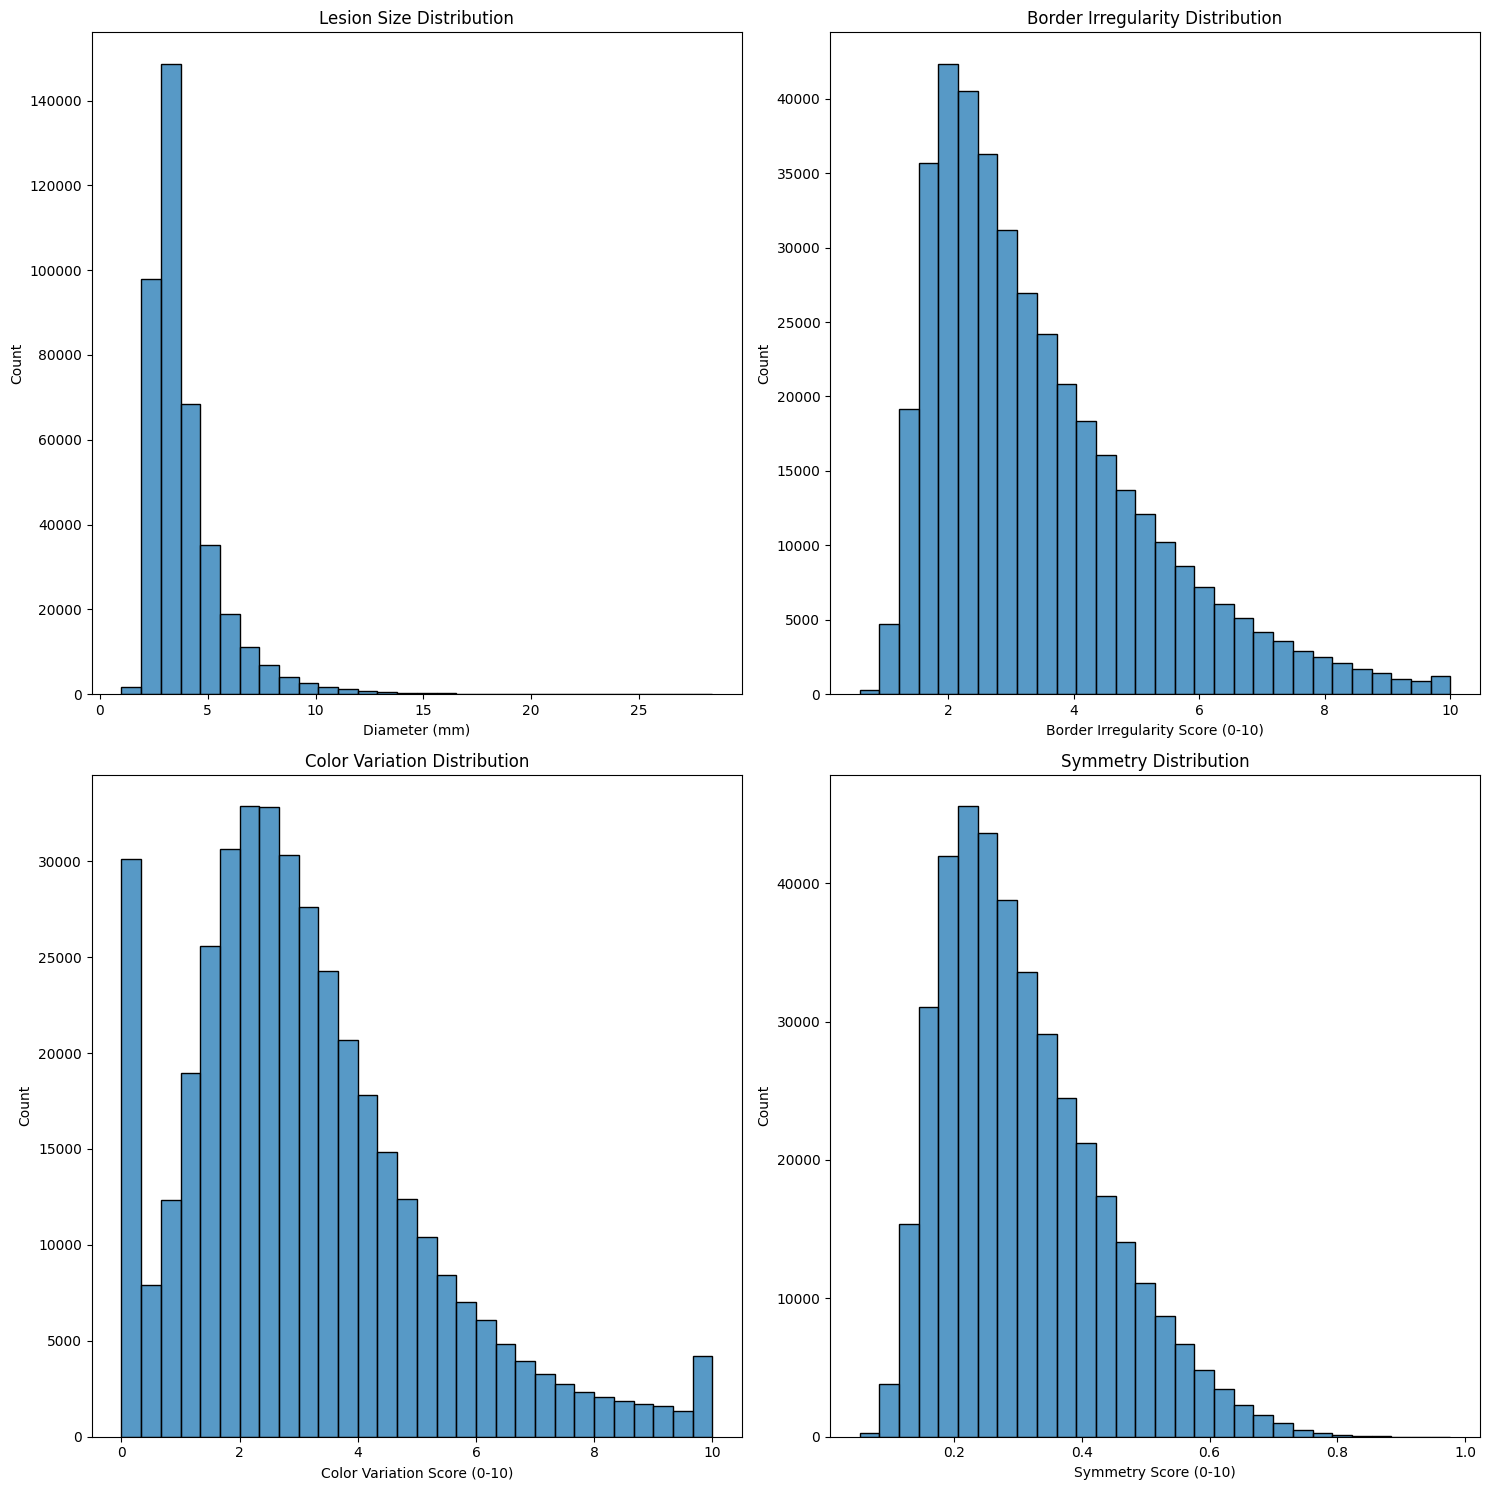

In [32]:
# Lesion Characteristics Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Size distribution
sns.histplot(data=isic_train, x='clin_size_long_diam_mm', bins=30, ax=axes[0,0])
axes[0,0].set_title('Lesion Size Distribution')
axes[0,0].set_xlabel('Diameter (mm)')

# Border irregularity
sns.histplot(data=isic_train, x='tbp_lv_norm_border', bins=30, ax=axes[0,1])
axes[0,1].set_title('Border Irregularity Distribution')
axes[0,1].set_xlabel('Border Irregularity Score (0-10)')

# Color variation
sns.histplot(data=isic_train, x='tbp_lv_norm_color', bins=30, ax=axes[1,0])
axes[1,0].set_title('Color Variation Distribution')
axes[1,0].set_xlabel('Color Variation Score (0-10)')

# Symmetry
sns.histplot(data=isic_train, x='tbp_lv_symm_2axis', bins=30, ax=axes[1,1])
axes[1,1].set_title('Symmetry Distribution')
axes[1,1].set_xlabel('Symmetry Score (0-10)')

plt.tight_layout()
plt.show()

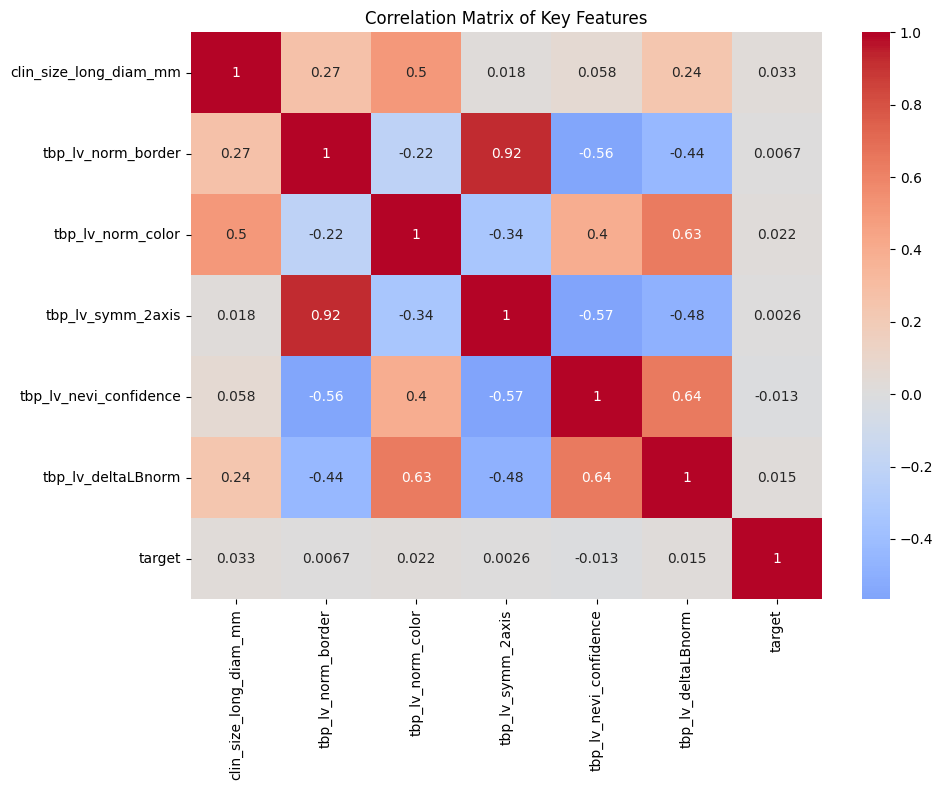

In [33]:
# Select important features for correlation analysis
important_features = [
    'clin_size_long_diam_mm',
    'tbp_lv_norm_border',
    'tbp_lv_norm_color',
    'tbp_lv_symm_2axis',
    'tbp_lv_nevi_confidence',
    'tbp_lv_deltaLBnorm',
    'target'
]

# Create correlation matrix
correlation_matrix = isic_train[important_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Features')
plt.tight_layout()
plt.show()

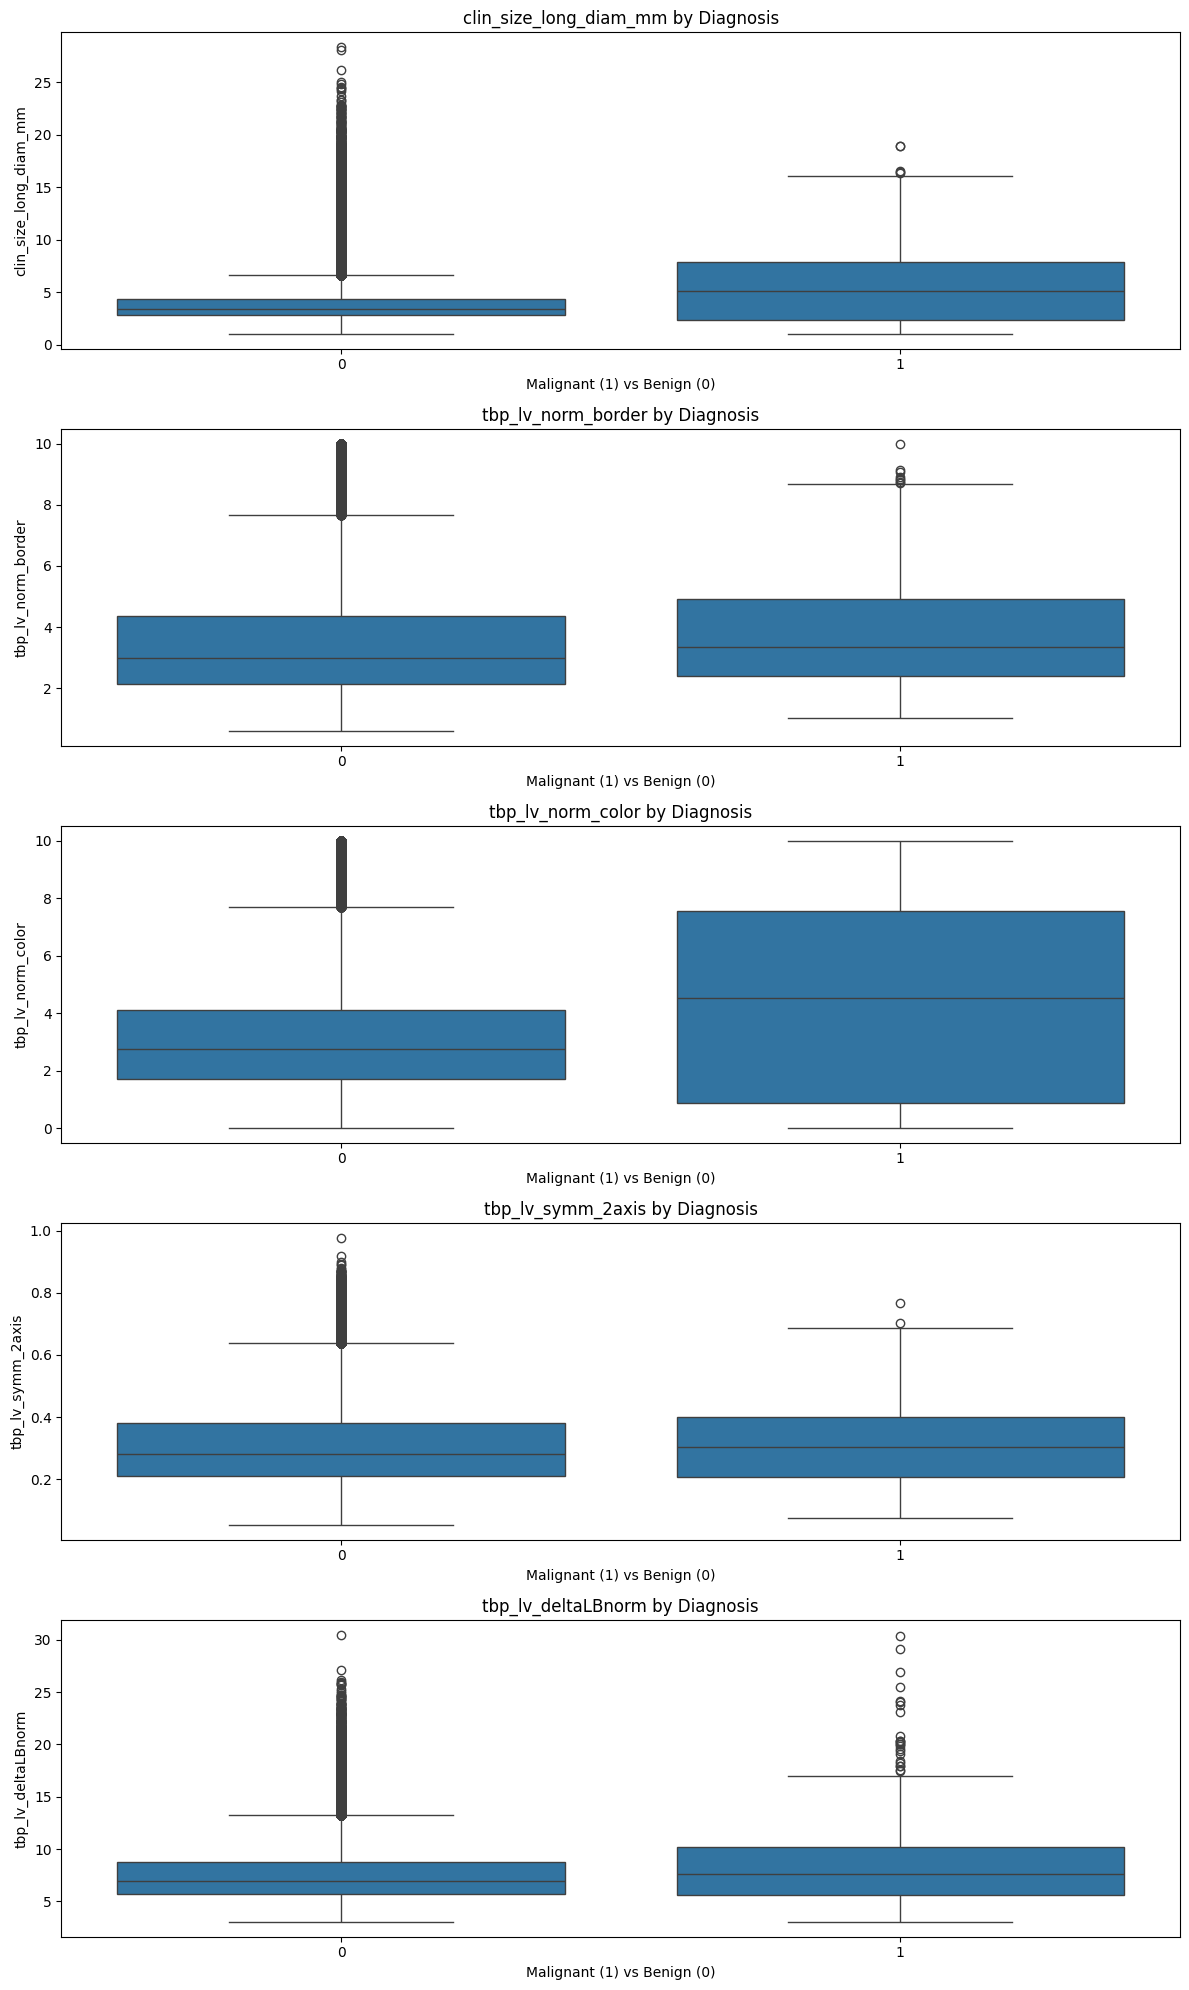

In [34]:
# Compare key features between benign and malignant cases
features_to_compare = [
    'clin_size_long_diam_mm',
    'tbp_lv_norm_border',
    'tbp_lv_norm_color',
    'tbp_lv_symm_2axis',
    'tbp_lv_deltaLBnorm'
]

fig, axes = plt.subplots(len(features_to_compare), 1, figsize=(12, 4*len(features_to_compare)))
for i, feature in enumerate(features_to_compare):
    sns.boxplot(data=isic_train, x='target', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Diagnosis')
    axes[i].set_xlabel('Malignant (1) vs Benign (0)')

plt.tight_layout()
plt.show()

In [6]:
import cv2

def load_image(image_path):
    base_path = 'isic-2024-challenge/train-image/image/'
    image = cv2.imread(os.path.join(base_path, image_path))
    cv2.imshow('Image', image)
    cv2.waitKey(0)

for i in range(10):
    load_image(all_images[i])